In [17]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import torch

import os

from ultralytics.utils import ops
from ultralytics.utils.plotting import save_one_box

In [18]:
# Load a model
model = YOLO('yolov8n.pt')  # pretrained YOLOv8n model

In [19]:
root_dir = 'data/sample/'
pics = os.listdir(root_dir)
pics = [os.path.join(root_dir, pic) for pic in pics]

In [20]:
results = model(pics) 


0: 320x640 1 person, 5 cars, 2 cell phones, 1: 320x640 1 person, 1 car, 2: 320x640 2 persons, 1 truck, 3: 320x640 1 person, 1 car, 2 trucks, 4: 320x640 1 person, 5 cars, 5: 320x640 1 person, 9.4ms
Speed: 2.1ms preprocess, 1.6ms inference, 2.2ms postprocess per image at shape (1, 3, 320, 640)


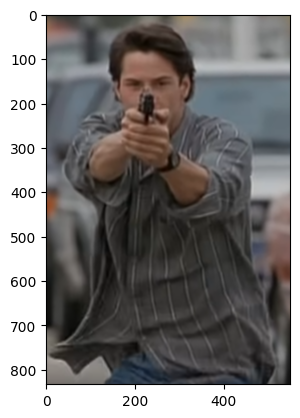

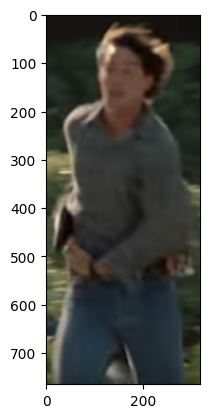

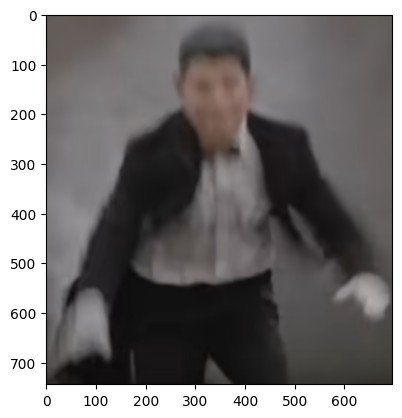

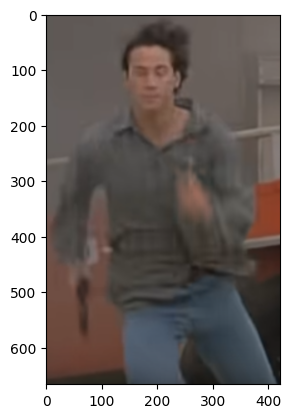

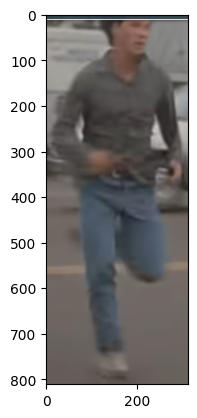

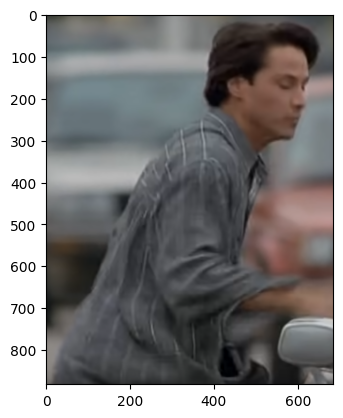

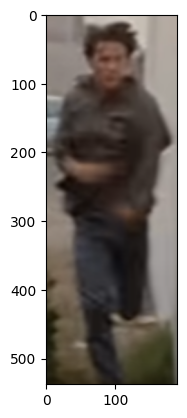

<Figure size 640x480 with 0 Axes>

In [24]:
img_list = []
for r, pic in zip(results, pics):
    im = cv2.imread(pic)
    for class_label, xyxy in zip(r.boxes.cls, r.boxes.xyxy):
        if class_label == 0:
            im_crop = save_one_box(xyxy, im, save=False)
            plt.imshow(im_crop)
            img_list.append(im_crop)
            plt.show()
            plt.clf()

In [25]:
len(img_list)

7

### Embedding values

In [37]:
from net.os_net import OSNet
from dataset.utils import make_transform
import PIL

In [29]:
transforms = make_transform()

In [41]:
transforms(PIL.Image.fromarray(img_list[0]))

torch.Size([3, 224, 224])